In [86]:
#%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

import yfinance as yf
from matplotlib.dates import WeekdayLocator, MonthLocator, YearLocator, DayLocator
#import matplotlib.dates as mdates

#import mplcursors

In [87]:
start_date = datetime.date(2024, 12, 30)
# end_date = datetime.date.today()
#end_date = '2025-06-13' # enter a specific date
end_date = datetime.date.today().strftime('%Y-%m-%d') # today's date. If not a trading day, specify the latest trading day above. Otherwise, an error will occur.

In [88]:
#%run ./nordnet_get_stock_prices_no_login.py ### don't run this coommand. It somehow makes error in datetime objects in the plots below. I don't know why.

## YFinance data retrieval (not working)

In [89]:
# #More symbols can be found at https://finance.yahoo.com/markets/world-indices/
# tickersymbols = {
#     'PMIH3I.CO': 'Horizon3',              # Horizon3
#     '^FCHI': 'CAC40',                     # Symbol for CAC40.
#     '^GDAXI': 'DAX',                      # Symbol for DAX.
#     '^NDX':'NASDAQ100',                   # NASDAQ100
#     '^IXIC': 'NASDAQ Composite',          # Symbol for NASDAQ Composite
#     '^GSPC': 'S&P500',                    # Symbol for S&P500
#     '^DJI': 'Dow Jones Industrial Av',    # Dow Jones Industrial Av
#     '^NYA': 'NYSE COMPOSITE (DJ)',        # NYSE COMPOSITE (DJ)
#     '^STOXX50E': 'STOXX50',              # STOXX50
#     '^OMXC25': 'OMXC25',                  # Copenhagen
#     '^OMXH25': 'OMXH25',                  # Helsinki
#     '^OMX': 'OMX (Stockholm)'#,           # Stockholm
#     #'^OMXO20PI': 'OMXO20PI'              # Oslo
#     }

In [90]:
#tickerdata = dict()

# #start_date = '2024-12-31'
# #end_date = '2025-03-31'
# start_date = datetime.date(2024, 12, 30)
# end_date = datetime.date.today()
# end_date = '2025-03-31'

# for tickersymbol in tickersymbols.keys():
#     tickerDf = yf.Ticker(tickersymbol)
#     tickerdata[tickersymbol] = tickerDf.history(period='1d', start = start_date, end = end_date)
#     tickerdata[tickersymbol]['Date'] = tickerdata[tickersymbol].index
#     tickerdata[tickersymbol]['Date'] = pd.to_datetime(tickerdata[tickersymbol]['Date'], format='%m-%d')

## Nordnet data retrieval

In [91]:
data = pd.read_csv("stock_prices.csv", sep=';')
data[['high', 'low', 'open', 'last']] = data[['high', 'low', 'open', 'last']].astype(float)
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

pivoted_data = data.pivot(index='date',columns='instrument',values='last')
pivoted_data = pivoted_data.dropna()
no_stocks = [1117, 425, 60, 340, 150, 70, 75, 180, 950, 170, 300]
pivoted_data['Total'] = (pivoted_data*no_stocks).sum(axis = 1)
pivoted_data

instrument,A & O Johansen A/S,D/S Norden,DSV A/S,Demant A/S,Novo Nordisk B,Pandora,Ringkjøbing Landbobank,Royal UNIBREW,Scandinavian Tobacco Group,Schouw & Co.,UIE,Total
date,,,,,,,,,,,,
2020-03-02,36.5,79.25,685.6,212.5,201.425,294.7,454.0,590.0,89.10,508.5,135.0,590520.50
2020-03-03,38.3,81.05,722.2,213.7,209.625,305.8,458.0,611.8,91.05,516.0,138.0,606158.60
2020-03-04,38.2,85.05,711.8,211.8,214.100,307.1,454.0,611.0,92.00,515.0,137.0,607227.65
2020-03-05,38.2,83.85,704.2,207.2,211.800,293.8,447.0,610.0,91.30,516.5,139.5,603056.65
2020-03-06,36.8,84.45,676.4,203.2,204.650,294.4,439.0,577.6,89.85,508.0,137.0,587684.85
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-12,89.8,214.40,1612.5,283.4,519.200,1178.0,1358.0,557.0,87.90,590.0,311.0,1024087.60
2025-06-13,90.4,220.00,1596.5,281.6,516.200,1149.0,1342.0,552.0,87.20,584.0,307.5,1018250.80
2025-06-16,88.5,215.80,1603.5,279.0,498.100,1199.5,1356.0,545.0,87.30,585.0,311.5,1015954.50


![jackson](Jacksons_portefølje_Q1-25.png)

date
2020-03-02   -40.944359
2020-03-03   -39.380454
2020-03-04   -39.273543
2020-03-05   -39.690668
2020-03-06   -41.227942
                ...    
2025-06-12     2.414987
2025-06-13     1.831271
2025-06-16     1.601627
2025-06-17     0.869533
2025-06-18     0.246545
Name: Total, Length: 1320, dtype: float64


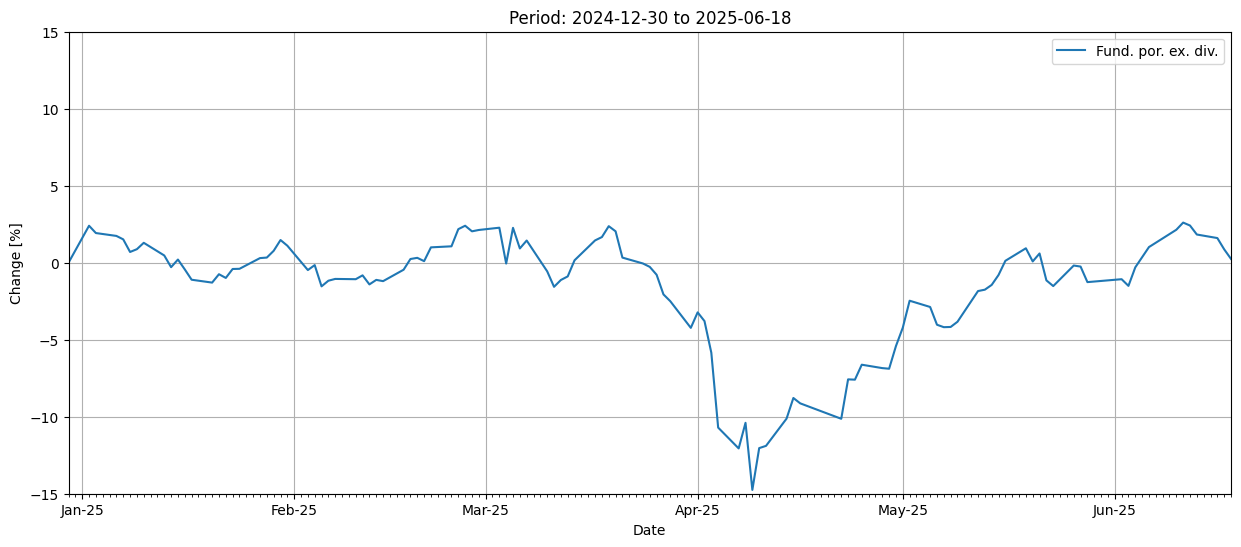

In [92]:
yloc = YearLocator()
mloc = MonthLocator()
wloc = WeekdayLocator()
dloc = DayLocator()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 6)

#start_date = datetime.date(2024, 12, 30) # defined at the top
#end_date = datetime.date.today()         # defined at the top  

ax.plot((pivoted_data['Total'] - pivoted_data.loc['2024-12-30']['Total'])/pivoted_data.loc['2024-12-30']['Total']*100, label = 'Fund. por. ex. div.')
print(((pivoted_data['Total'] - pivoted_data.loc['2024-12-30']['Total'])/pivoted_data.loc['2024-12-30']['Total']*100))
#for tickersymbol in tickersymbols.keys(): 
#    ax.plot(tickerdata[tickersymbol]['Date'], (tickerdata[tickersymbol]['Close'] - tickerdata[tickersymbol]['Close'].iloc[0])*100/tickerdata[tickersymbol]['Close'].iloc[0], label = tickersymbols[tickersymbol])

ax.xaxis.set_major_locator(mloc)
ax.xaxis.set_minor_locator(dloc)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y')) # see https://strftime.org/ for possible formats
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m-%d'))
ax.grid('both');
ax.legend();
#ax.set_xlim([datetime.date(2024, 12, 30), datetime.date(2025, 3, 28)])
#plt.xlim([datetime.date(2024, 12, 30), datetime.date.today()])
ax.set_xlim([datetime.date(2024, 12, 30), datetime.date.today()])
ax.set_ylim([-15, 15])
ax.set_xlabel('Date');
ax.set_ylabel('Change [%]');
ax.set_title("Period: {} to {}".format(start_date, end_date));

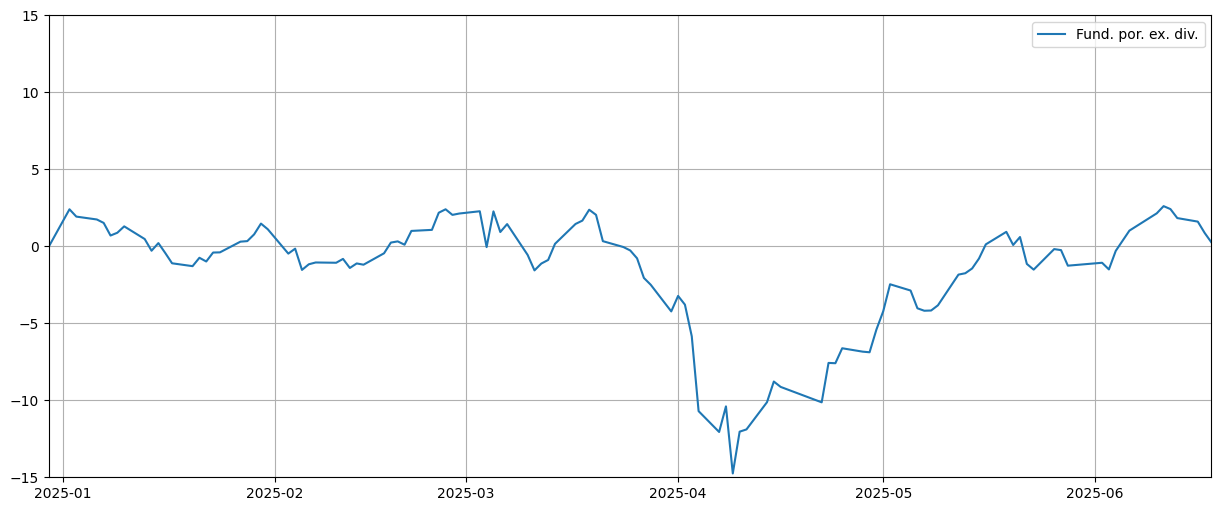

In [93]:
#plt.plot(pivoted_data['Total'])
#plt.ylim([900000,1100000])
plt.figure(figsize=(15, 6))
plt.plot((pivoted_data['Total'] - pivoted_data.loc['2024-12-30']['Total'])/pivoted_data.loc['2024-12-30']['Total']*100, label = 'Fund. por. ex. div.')
plt.ylim([-15,15])
#plt.yticks([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])
plt.xlim([datetime.date(2024, 12, 30), datetime.date.today()])
plt.grid()
plt.legend()
#mplcursors.cursor(hover=True)
plt.show()

#Kig på https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html for at for ideer til hvordan man kan få trimmet værdier på x-aksen.
# afhængig af hvor langt man er kommet ind i året kan man vælge: dage, uger, måneder etc.

In [94]:
pivoted_data

instrument,A & O Johansen A/S,D/S Norden,DSV A/S,Demant A/S,Novo Nordisk B,Pandora,Ringkjøbing Landbobank,Royal UNIBREW,Scandinavian Tobacco Group,Schouw & Co.,UIE,Total
date,,,,,,,,,,,,
2020-03-02,36.5,79.25,685.6,212.5,201.425,294.7,454.0,590.0,89.10,508.5,135.0,590520.50
2020-03-03,38.3,81.05,722.2,213.7,209.625,305.8,458.0,611.8,91.05,516.0,138.0,606158.60
2020-03-04,38.2,85.05,711.8,211.8,214.100,307.1,454.0,611.0,92.00,515.0,137.0,607227.65
2020-03-05,38.2,83.85,704.2,207.2,211.800,293.8,447.0,610.0,91.30,516.5,139.5,603056.65
2020-03-06,36.8,84.45,676.4,203.2,204.650,294.4,439.0,577.6,89.85,508.0,137.0,587684.85
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-12,89.8,214.40,1612.5,283.4,519.200,1178.0,1358.0,557.0,87.90,590.0,311.0,1024087.60
2025-06-13,90.4,220.00,1596.5,281.6,516.200,1149.0,1342.0,552.0,87.20,584.0,307.5,1018250.80
2025-06-16,88.5,215.80,1603.5,279.0,498.100,1199.5,1356.0,545.0,87.30,585.0,311.5,1015954.50


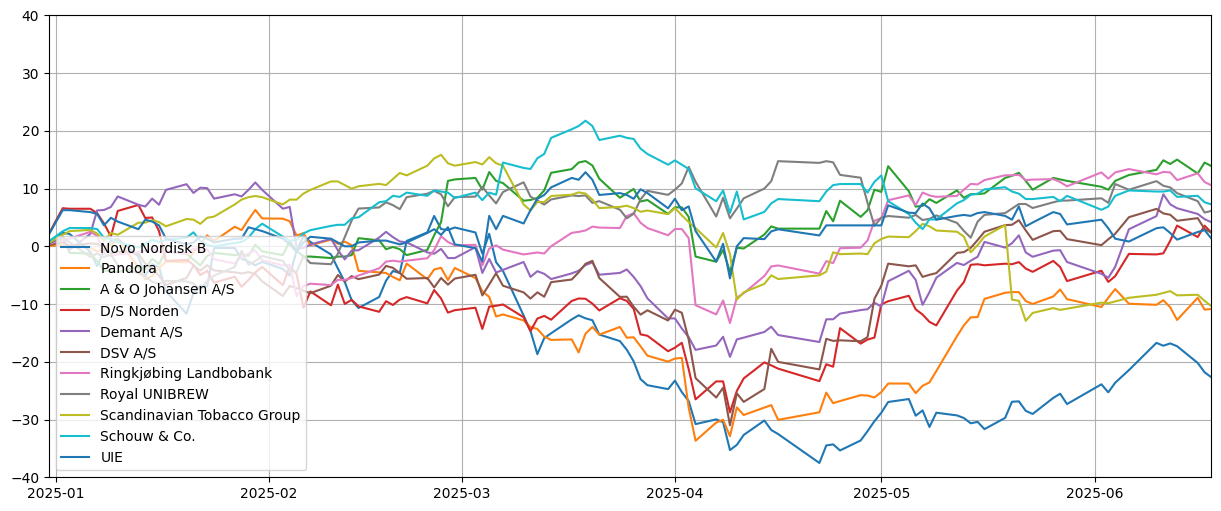

In [95]:
#type(data)
#data.info()
plt.figure(figsize=(15, 6))
for stock in data['instrument'].unique():
    #plt.plot(data[data['instrument'] == stock]['date'], data[data['instrument'] == stock]['last'], label = stock)
    plt.plot(data[data['instrument'] == stock]['date'], (data[data['instrument'] == stock]['last']- float(data.loc[data['date'] == '2024-12-30'].loc[data['instrument'] == stock]['last'].iloc[0]))/float(data.loc[data['date'] == '2024-12-30'].loc[data['instrument'] == stock]['last'].iloc[0])*100, label = stock)
plt.xlim([datetime.date(2024, 12, 31), datetime.date.today()])
plt.ylim([-40,40])
plt.grid()
plt.legend(loc='lower left')
#plt.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
plt.show()

In [96]:
perf = []

#for i in range(10000):
#    data.append({'A': i})

#df = pd.DataFrame(data)

for stock in data['instrument'].unique():
     #print(stock)
     #print((float(data.loc[data['date'] == '2025-03-31'].loc[data['instrument'] == stock]['last'].iloc[0])- float(data.loc[data['date'] == '2024-12-30'].loc[data['instrument'] == stock]['last'].iloc[0]))/float(data.loc[data['date'] == '2024-12-30'].loc[data['instrument'] == stock]['last'].iloc[0])*100)
     perf.append({stock:(float(data.loc[data['date'] == '2025-03-31'].loc[data['instrument'] == stock]['last'].iloc[0]) - float(data.loc[data['date'] == '2024-12-30'].loc[data['instrument'] == stock]['last'].iloc[0]))/float(data.loc[data['date'] == '2024-12-30'].loc[data['instrument'] == stock]['last'].iloc[0])*100})
     #print("{} {:.1f}%".format(stock, (float(data.loc[data['date'] == '2025-03-31'].loc[data['instrument'] == stock]['last'].iloc[0])- float(data.loc[data['date'] == '2024-12-30'].loc[data['instrument'] == stock]['last'].iloc[0]))/float(data.loc[data['date'] == '2024-12-30'].loc[data['instrument'] == stock]['last'].iloc[0])*100))
df = pd.DataFrame(perf, )
#df = pd.DataFrame.from_dict(perf)
#print(df)
#print(perf)
#type(perf)
#df
names = [stock for stock in data['instrument'].unique()]
perf = [(float(data.loc[data['date'] == end_date].loc[data['instrument'] == stock]['last'].iloc[0]) - float(data.loc[data['date'] == '2024-12-30'].loc[data['instrument'] == stock]['last'].iloc[0]))/float(data.loc[data['date'] == '2024-12-30'].loc[data['instrument'] == stock]['last'].iloc[0])*100 for stock in data['instrument'].unique()]
dict = {'names': names, 'perf': perf}
#print([stock for stock in data['instrument'].unique()])
#names
#perf
df = pd.DataFrame(dict).sort_values(by = 'perf', ascending=False)
df


,names,perf
2,A & O Johansen A/S,13.867684
6,Ringkjøbing Landbobank,10.548173
9,Schouw & Co.,7.249071
7,Royal UNIBREW,6.132542
4,Demant A/S,4.163512
5,DSV A/S,2.354480
3,D/S Norden,2.354049
10,UIE,1.315789
8,Scandinavian Tobacco Group,-10.388248
1,Pandora,-10.858011


In [97]:
pivoted_data['Total'] 

date
2020-03-02     590520.50
2020-03-03     606158.60
2020-03-04     607227.65
2020-03-05     603056.65
2020-03-06     587684.85
                 ...    
2025-06-12    1024087.60
2025-06-13    1018250.80
2025-06-16    1015954.50
2025-06-17    1008634.00
2025-06-18    1002404.50
Name: Total, Length: 1320, dtype: float64

Følgende aktier har udbetalt udbytte i perioden (pr. 3. april 2025): 
Pandora (20 kr.), 
Ringkjøbing Landbobank (11 kr.), 
Novo Nordisk (7,9 kr.), 
DSV (7 kr.), 
A.O. Johansen (3,0 kr.)
 D/S Norden (2 kr.), Kontantbeholdningen steg dermed til 8.092 kr.
 Tilføjet 27/5:
 UIE 5,91 kr. (ialt 300*5.91kr. = 1773). Kontantbeholdningen steg dermed til 8.092 kr + 1773 kr. = 9.865 kr. 

In [98]:
print("Relative ændring siden start på året: {:.2f}%".format((pivoted_data['Total'].iloc[-1]+9865-1000000)/1000000*100))
print("Daglige relative ændring: {:.2f}%".format((pivoted_data['Total'].iloc[-1]-pivoted_data['Total'].iloc[-2])/pivoted_data['Total'].iloc[-2]*100))

Relative ændring siden start på året: 1.23%
Daglige relative ændring: -0.62%
